# How well do IMDb ratings reflect Star Trek fan consensus?

The IMDb rating of a Star Trek episode represents the average score out of 10 given by the IMDB users who chose to rate it. Therefore it is interesting (for certain definitions of the word!) to consider how well these ratings reflect the Star Trek fandom consensus as to which episodes are the best and worst. Of course, there is no such thing as "fandom consensus", so what we're really measuring against here is my own biased interpretation of the consensus; still, with this caveat in mind, let us see what we shall see... 

[One of the major issues with any kind of online voting system is brigading: people/bots deliberately giving high, or low, ratings in order to influence opinion. This especially tends to be the case with things that are controversial, with unhappy fans sometimes being much more likely to give negative reviews. This is one of the reasons that I decided not to include the Discovery-era Star Trek shows in this analysis, as these have split fan opinion and I can't really intuit the relative size of the different factions; certainly there's a vocal group of fans that hate them, but it's not clear to me whether they're truly more numerous than fans with a more positive opinion or just louder. For what it's worth, I fall somewhere in the middle. I dislike Discovery and think it was a complete mess from the off; Spock has a secret sister, come on! Picard I thought was much promising in its first season, before an atrocious second. Lower Decks I tried and couldn't really get into, but I'm not a great fan of animation and it did seem to be a genuinely affectionate parody, so I can chalk that up to "just not my thing". Prodigy and Strange New Worlds I haven't seen yet; the former doesn't really appeal to me, and the latter hasn't aired in the UK yet.]

### The Next Generation

We start with *Star Trek: The Next Generation* (TNG), as that is the series that I am most familiar with. Let's sort the TNG dataframe and print the ten highest rated episodes:

In [1]:
import pandas as pd

tng = pd.read_pickle("imdb-ratings/TNG")
tng_sorted = tng.sort_values(by='rating', ascending=False)
tng_sorted.head(10)

,season,episode_number,title,airdate,rating,total_votes,desc
123,5,25,The Inner Light,1995-06-07,9.4,6978,Picard awakes to find himself living in a smal...
72,3,26,The Best of Both Worlds,1992-04-29,9.3,4899,Responding to a distress call on one of the Fe...
61,3,15,Yesterday's Enterprise,1992-01-29,9.2,5066,The Enterprise C enters the Enterprise D's tim...
73,4,1,The Best of Both Worlds Part II,1992-05-06,9.2,4606,Having absorbed Captain Picard and his knowled...
33,2,9,The Measure of a Man,1991-05-29,9.1,5277,When Data resigns his commission rather than b...
175,7,25,Star Trek: The Next Generation-All Good Things...,1996-06-19,9.0,8482,Capt. Picard finds himself shifting continuall...
40,2,16,Q Who,1991-08-07,8.9,4302,Q tries to prove that Picard needs him as part...
116,5,18,Cause And Effect,1995-04-19,8.9,4012,The Enterprise gets caught in a time loop whic...
135,6,11,"Chain Of Command, Part II",1995-09-20,8.9,3360,While the humorless Captain Jellico leads the ...
139,6,15,Tapestry,1995-10-18,8.8,3644,"When Captain Picard's artificial heart fails, ..."


Looks broadly reasonable; those are all well-regarded episodes among fans. I am a bit surprised that *Cause and Effect* is rated so highly, since it's less prominent in the fandom than others that are rated lower, but it *is* a solid episode that I personally like a lot as well. (My own top ten would have a large intersection with the above, although there are personal favourites that would replace a few of them, most notably *Yesterday's Enterprise*, which I always thought was overrated.) A few random other things to note:
1. The odd formatting of *All Good Things...*, the final episode, which is preceded by the name of the series. 
2. *All Good Things...* is also treated as a single episode, whereas *The Best of Both Worlds* is not.  

Now, let's do the same for the 10 *worst*-rated episodes:

In [2]:
tng_sorted.tail(10)

,season,episode_number,title,airdate,rating,total_votes,desc
6,1,7,Justice,1990-11-28,6.0,3503,"On an alien planet, young Wesley Crusher commi..."
137,6,13,Aquiel,1995-10-04,6.0,2379,Murderous intrigue abounds for the Enterprise ...
120,5,22,Imaginary Friend,1995-05-17,6.0,2433,"A powerful, potentially dangerous energy life ..."
167,7,17,Masks,1996-05-01,5.8,2524,Investigating a rogue comet that's been travel...
25,2,1,The Child,1991-04-03,5.8,3303,Deanna is impregnated by a unknown alien life-...
127,6,3,Man Of The People,1995-07-26,5.7,2419,When the Enterprise comes to the rescue of an ...
12,1,13,Angel One,1991-01-09,5.7,3205,"Riker, Troi, Data and Yar beam down to a plane..."
2,1,3,Code of Honor,1990-10-10,5.2,3874,When the leader of an alien culture takes a ro...
164,7,14,Sub Rosa,1996-04-10,4.8,2740,Dr. Crusher meets the man in her dead grandmot...
46,2,22,Shades of Gray,1991-10-02,3.4,3449,When Commander Riker comes down with a dangero...


Again, reasonable - these are bad, poorly-regarded episodes on the whole. It's also interesting to note that the three worst-rated episodes are decisively so, especially *Shades of Gray*. This jives with the fandom consensus; unlike the rest of the bad episodes, which are usually just boring and can be safely ignored, these episodes provoke stronger reactions in many fans: *Shades of Grey* is a clipshow with almost no new footage, *Code of Honor* is often viewed as racist, and *Sub Rosa* is just plain crazy, approaching "so bad it's good" territory. One last thing to note: on the whole these episodes have fewer votes than the top ten (more on this later).    

It is widely believed that TNG - and most of the other Star Trek TV shows - began badly before ["growing the beard"](https://tvtropes.org/pmwiki/pmwiki.php/Main/GrowingTheBeard) in around the third season. Do the ratings support this? Let's plot them in chronological order and see:

<AxesSubplot:xlabel='airdate'>

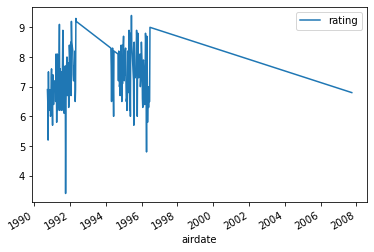

In [3]:
import matplotlib.pyplot as plt

tng.plot(x="airdate", y="rating")

Well, that's interesting! What is going on here?

In [4]:
tng["airdate"].max()

Timestamp('2007-09-29 00:00:00')

In [5]:
tng.iloc[tng["airdate"].idxmax()]

season                                                            3
episode_number                                                   12
title                                               The High Ground
airdate                                         2007-09-29 00:00:00
rating                                                          6.8
total_votes                                                    2793
desc              While visiting a planet under civil war, Dr. C...
Name: 58, dtype: object

That's obviously not correct, since "The High Ground" was part of the show's third season. I *do* however recall that there was some controversy about this episode: it was not aired on the BBC during the show's original run because of a (ridiculously brief) reference to the conflict in Northern Ireland (very much a controversial topic in the UK in the early 1990s). This suggests that the airdates, which I had assumed corresponded to their first airing in America, may refer to the date when the episodes first aired on the BBC. This is likely also the reason for the large break during season 4 - after the second part of "The Best of Both Worlds", which aired on 6th May 1992, the following episode "Family" didn't air until 13th April 1994; to the consternation of '90s scifi fans, such as a young me, the BBC was always doing frustrating shit like this...  

We need to find something else to plot against. It makes more sense to plot where the episode falls in the show's run, rather than the date it first aired, so let's create a new column:

In [6]:
tng["series_id"] = tng.season.astype(str) + "." + tng.episode_number.astype(str)
tng

,season,episode_number,title,airdate,rating,total_votes,desc,series_id
0,1,1,Encounter at Farpoint,1990-09-26,6.9,6465,On the maiden mission of the U.S.S. Enterprise...,1.1
1,1,2,The Naked Now,1990-10-03,6.5,3971,The crew of the Enterprise is infected with a ...,1.2
2,1,3,Code of Honor,1990-10-10,5.2,3874,When the leader of an alien culture takes a ro...,1.3
3,1,4,The Last Outpost,1990-10-31,6.3,3542,The Enterprise makes a confrontational first c...,1.4
4,1,5,Where No One Has Gone Before,1990-10-17,7.5,3882,Everyone accurately pegs a visiting propulsion...,1.5
...,...,...,...,...,...,...,...,...
171,7,21,Firstborn,1996-05-29,6.8,2164,In an effort to help him accept his Klingon he...,7.21
172,7,22,Bloodlines,1996-06-05,6.5,2115,Picard races the Ferengi in an effort to track...,7.22
173,7,23,Emergence,1996-06-12,6.5,2167,Strange images begin appearing throughout the ...,7.23
174,7,24,Preemptive Strike,1996-06-17,7.9,2378,Following her return from Advanced Tactical Tr...,7.24


<AxesSubplot:xlabel='series_id'>

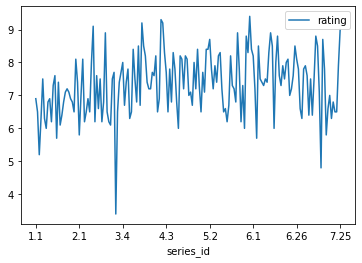

In [7]:
tng.plot(x="series_id", y="rating")

Looks sensible, but let's prettify that image before making any conclusions:

In [8]:
plt.rcParams['figure.figsize'] = (15, 8)

import seaborn as sns
sns.set_theme(style="darkgrid") 

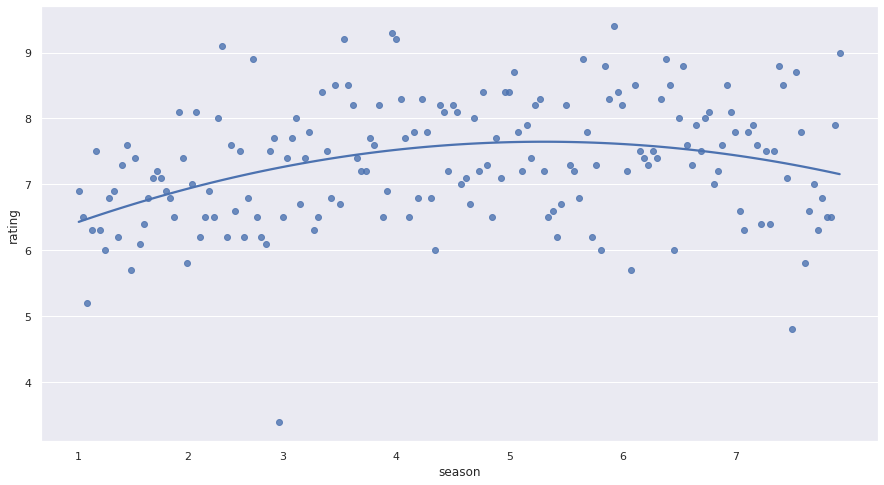

In [11]:
# Get index of season openers to use as xticks. TODO: find a neater way
season_openers = tng.loc[tng["episode_number"] == 1]

# Make the plot
ax = sns.regplot(data=tng, x=tng.index, y="rating", order=2, ci=None)
ax.set(xticks=season_openers.index,
      xticklabels=[1, 2, 3, 4, 5, 6, 7],
      xlabel="season")
ax.grid(axis="x") 

This broadly supports the "growing the beard" hypothesis, although the effect is less pronounced than I would have expected. Note there is also a clear decline in the average rating after around season 6, which doesn't surprise me personally: season 7, in particular, I think is very hit-and-miss, with several standout episodes but some absolute shockers as well. 

### Deep Space Nine

Now let's repeat the analysis for *Deep Space Nine* (DS9):

In [12]:
ds9 = pd.read_pickle("imdb-ratings/DS9")
ds9_sorted = ds9.sort_values(by='rating', ascending=False)
ds9_sorted.head(10)

,season,episode_number,title,airdate,rating,total_votes,desc
140,6,19,In the Pale Moonlight,2000-03-15,9.4,3543,"To save the Federation in a critical scheme, S..."
101,5,6,Trials and Tribble-ations,1998-02-12,9.3,3422,Sisko tells two men from Temporal Investigatio...
72,4,2,The Visitor,1997-05-01,9.1,3567,"Melanie, an aspiring writer, wants to know why..."
17,1,18,Duet,1996-01-25,9.0,3048,"A Cardassian suffering from Kalla-Nohra, a dis..."
71,4,1,The Way of the Warrior,1997-04-24,9.0,2480,Sisko becomes uncomfortable when the Klingons ...
127,6,6,Sacrifice of Angels,1999-12-01,9.0,2073,The Federation attacks DS9 in hopes of keeping...
121,5,26,Call to Arms,1999-01-07,9.0,1932,With the continuing battalions of Jem'Hadar en...
172,7,25,What You Leave Behind,1999-06-02,8.9,2184,"As the Dominion War comes to an end, Dukat goe..."
65,3,21,The Die Is Cast,1997-03-13,8.9,2123,"Now rejoined with his former mentor, Garak is ..."
110,5,15,By Inferno's Light,1998-10-15,8.8,1950,The station readies for a Dominion attack. Wor...


No surprises here; these are all well-regarded episodes.

And the worst:

In [13]:
ds9_sorted.tail(10)

,season,episode_number,title,airdate,rating,total_votes,desc
54,3,10,Fascination,1997-01-09,6.2,1743,When Lwaxana Troi visits the station for the B...
145,6,24,Time's Orphan,2000-05-17,6.2,1663,The Chief's daughter gets caught in a time dis...
27,2,9,Second Sight,1996-04-04,6.2,1800,While noted scientist Gideon Seyetik is prepar...
12,1,13,The Storyteller,1995-12-21,6.0,1949,While Sisko tries to negotiate an agreement be...
8,1,9,Move along Home,1995-11-23,5.8,2150,"The Wadi from the Gamma Quadrant visit DS9, th..."
144,6,23,Profit and Lace,2000-05-10,5.8,1732,Quark's mother and the Grand Nagus show up on ...
90,4,20,The Muse,1997-10-09,5.7,1683,A mysterious woman approaches Jake about his f...
129,6,8,Resurrection,1999-12-15,5.7,1588,Major Kira takes a romantic interest in the mi...
52,3,8,Meridian,1996-12-19,5.6,1790,Dax falls in love with one of the residents of...
102,5,7,Let He Who Is without Sin...,1998-02-19,5.6,1787,"While vacationing on Risa, Worf and Dax meet a..."


As before, no surprises. 

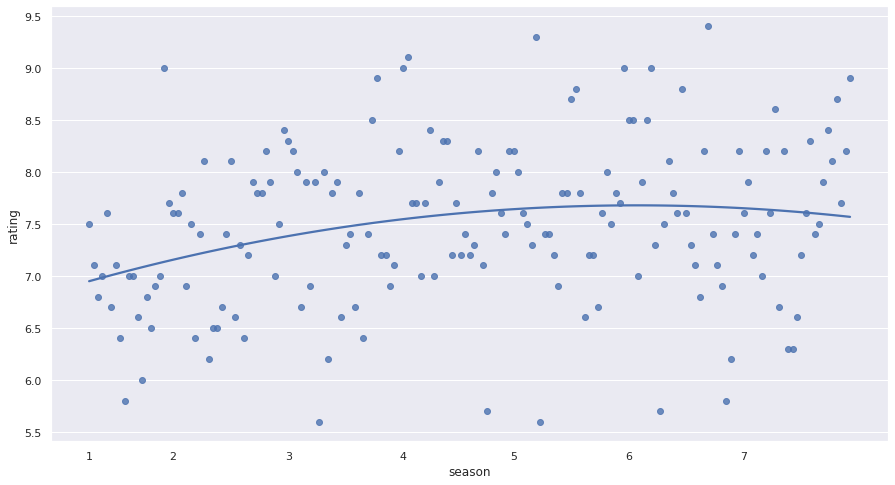

In [14]:
ds9 = pd.read_pickle("imdb-ratings/DS9")

season_openers = ds9.loc[ds9["episode_number"] == 1]

ax = sns.regplot(data=ds9, x=ds9.index, y="rating", order=2, ci=None)
ax.set(xticks=season_openers.index,
      xticklabels=[1, 2, 3, 4, 5, 6, 7],
      xlabel="season")
ax.grid(axis="x") 

This is very similar to the plot for TNG, although the decline toward the end of the series is less pronounced. 

### Voyager

*Voyager* (VOY) was the next series to air, so rinse and repeat...

In [17]:
voy = pd.read_pickle("imdb-ratings/VOY")
voy_sorted = voy.sort_values(by='rating', ascending=False)
voy_sorted.head(10)

,season,episode_number,title,airdate,rating,total_votes,desc
129,6,12,Blink Of An Eye,2001-08-14,9.0,2794,Voyager becomes trapped in orbit of a planet w...
66,3,26,Scorpion,1998-12-06,8.9,2153,"About to enter Borg space, Voyager finds a thr..."
67,4,1,"Scorpion, Part II",1998-12-20,8.9,2138,Voyager finds a solution to combat the invader...
74,4,8,Year Of Hell,1999-02-21,8.7,2166,Voyager comes across a Krenim timeship that's ...
80,4,14,Message In A Bottle,1999-05-23,8.7,2201,"Using an alien communications net, Voyager sen..."
89,4,23,Living Witness,1999-10-03,8.7,2200,The Doctor awakens in the museum of an alien c...
98,5,6,Timeless,2000-02-27,8.7,2205,A miscalculation by Ensign Kim causes a fatal ...
75,4,9,"Year Of Hell, Part II",1999-03-07,8.6,2047,A year after Voyager encounters the Krenim tim...
94,5,2,Drone,2000-01-30,8.6,2101,Voyager investigates the birth of a nebula. Un...
63,3,23,Distant Origin,1998-11-15,8.5,2028,"A superior race, descended from Earth dinosaur..."


As before, seems reasonable. What about the worst episodes?

In [18]:
voy_sorted.tail(10)

,season,episode_number,title,airdate,rating,total_votes,desc
128,6,11,Fair Haven,2001-07-31,6.2,1582,Capt. Janeway falls for an Irish barman charac...
120,6,3,Barge Of The Dead,2001-05-15,6.2,1553,A brutal experience aboard a shuttle puts B'El...
97,5,5,Once Upon A Time,2000-02-20,6.2,1558,Long-traumatized by the loss of his own family...
134,6,17,Spirit Folk,2001-09-18,6.1,1530,"For the holographic inhabitants of Fair Haven,..."
23,2,9,Tattoo,1997-04-06,6.1,1655,Finding a familiar cultural symbol on an away ...
60,3,20,Favorite Son,1998-10-25,6.0,1511,"Ensign Kim's DNA changes, bringing with it mem..."
18,2,4,Elogium,1997-01-26,5.9,1664,The Voyager encounters a swarm of mysterious l...
47,3,7,Sacred Ground,1997-11-23,5.8,1707,After Kes is injured by an energy field on a p...
29,2,15,Threshold,1997-05-25,5.3,1986,Tom's attempt to cross the time warp threshold...
110,5,18,The Fight,2000-07-23,5.0,1605,"As unseen aliens adjust his neural pathways, C..."


Again, reasonable overall, but there are a couple of things that slightly surprised me. First of all, *Threshold* isn't rock bottom, despite being widely-regarded as one of the worst episodes in all of Star Trek, although I suspect the same effect is in play as for the two worst-rated TNG episodes: like *Sub Rosa*, *Threshold* has a lot of "so bad it's good" fans, whereas, like *Shades of Gray*, *The Fight* is just plain boring. 

The second mild surprise was that even the worst-rated VOY episodes score higher than the two worst-rated TNG episodes and, although there are seven TNG episodes rated below 6.0, there are only two for VOY. *The Next Generation* is, probably rightly, regarded as more hit-and-miss than *Voyager*, but there are still plenty of dire VOY episodes. This is all subjective of course, but I suspect the reason for this is the smaller cultural footprint of VOY compared to TNG; put simply, you probably aren't going to be reviewing VOY on IMDb unless you're a big fan of that specific series, so there's likely an inherent bias that may be less pronounced for the more prominent TNG. Indeed, we can see that the worst-rated VOY episodes have only about half as many reviews as the worst-rated TNG episodes.     

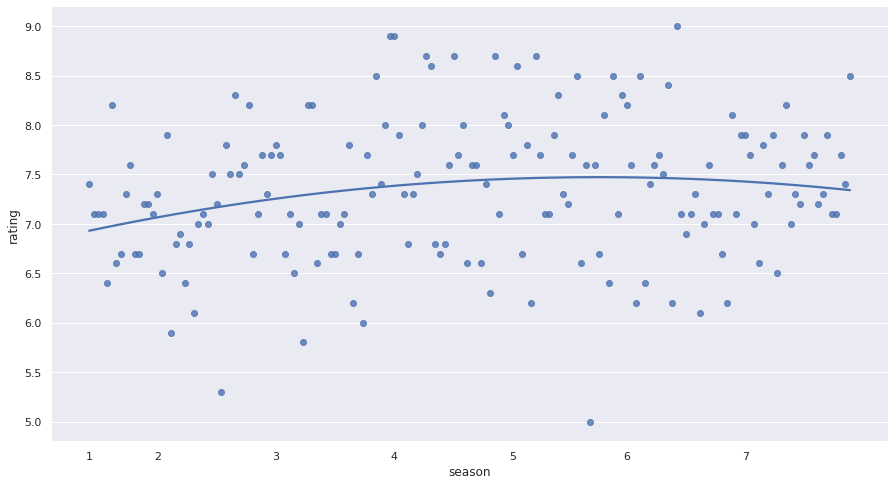

In [21]:
voy = pd.read_pickle("imdb-ratings/VOY")

season_openers = voy.loc[voy["episode_number"] == 1]

ax = sns.regplot(data=voy, x=voy.index, y="rating", order=2, ci=None)
ax.set(xticks=season_openers.index,
      xticklabels=[1, 2, 3, 4, 5, 6, 7],
      xlabel="season")
ax.grid(axis="x") 

This has the same general shape as for TNG and DS9, so there's little else to say here.

### Enterprise

What are the ten highest-rated episodes of *Star Trek: Enterprise* (ENT)?

In [22]:
ent = pd.read_pickle("imdb-ratings/ENT")
ent_sorted = ent.sort_values(by='rating', ascending=False)
ent_sorted.head(10)

,season,episode_number,title,airdate,rating,total_votes,desc
58,3,8,Twilight,2003-11-05,8.7,1796,"His memory crippled, Archer awakens years in t..."
68,3,18,Azati Prime,2004-03-03,8.6,1436,Archer decides he should pilot a kamikaze shut...
26,2,2,Carbon Creek,2002-09-25,8.5,1954,On the first anniversary of her assignment to ...
47,2,23,Regeneration,2003-05-07,8.5,2222,An Arctic research team makes a startling find...
73,3,23,Countdown,2004-05-19,8.5,1344,While the Reptilians force Hoshi to decipher a...
74,3,24,Zero Hour,2004-05-26,8.5,1412,Archer takes Degra's ship to try to prevent Ea...
87,4,13,United,2005-02-04,8.5,1331,"Captain Archer must convince Vulcans, Tellarit..."
83,4,9,Kir'Shara,2004-12-03,8.4,1361,While Enterprise travels to Andoria to warn th...
63,3,13,Proving Ground,2004-01-21,8.4,1432,Enterprise has found the location of the testi...
86,4,12,Babel One,2005-01-28,8.4,1352,Enterprise escorts Tellarites to peace talks w...


Unlike the earlier series, this list surprises me to an extent and it's the only one so far for which my personal favorite ("In a Mirror Darkly") isn't present in the top ten. Season 4 is regarded as the strongest and, although it has a few episodes in the top ten, doesn't dominate the list as I would have expected. Season 3 was more heavily serialized than most of the earlier series (except DS9) and was somewhat divisive in the fandom, so I'm surprised that all of the top three are from that season, with "Zero Hour" and "Azati Prime" both being part of that larger arc. However, these episodes also have considerably fewer votes than the corresponding top tens for the earlier series, suggesting that the fan bias effect mentioned earlier could be responsible. 

Now the worst:

In [31]:
ent_sorted.tail(10)

,season,episode_number,title,airdate,rating,total_votes,desc
29,2,5,A Night in Sickbay,2002-10-16,6.6,1568,"After previously offending the Kreetassans, En..."
67,3,17,Hatchery,2004-02-25,6.6,1310,Captain Archer orders the crew of Enterprise t...
16,1,18,Rogue Planet,2002-03-20,6.5,1468,"Lieutenant Reed discovers a rogue planet, whic..."
35,2,11,Precious Cargo,2002-12-11,6.5,1466,While Trip is repairing a stasis pod at a Rete...
4,1,6,Terra Nova,2001-10-24,6.5,1643,Enterprise tries to find out what happened on ...
44,2,20,Horizon,2003-04-16,6.5,1312,Mayweather temporarily leaves Enterprise to vi...
8,1,10,Fortunate Son,2001-11-21,6.4,1522,Enterprise is sent to help the freighter Fortu...
84,4,10,Daedalus,2005-01-14,6.2,1306,Dr. Emory Erickson comes aboard to supposedly ...
53,3,3,Extinction,2003-09-24,6.0,1389,"Archer, Reed and Sato are transformed into ali..."
96,4,22,These Are the Voyages...,2005-08-02,5.3,2181,"In 2370, Commander William T. Riker is trying ..."


The episodes listed here are poorly regarded across the board, so in that regard there's little surprising here. However, we can also see that all of the episodes except "These Are The Voyages..." have a rating greater than 6.1, which wouldn't even get into TNG's bottom ten. As before, the bias arising from the fact that fans of the series are much more likely to leave reviews than critics is likely responsible for this, since ENT in general was very controversial in the wider Star Trek fandom.   

### All series

Finally, let's see which are the ten highest- and lowest-rated TV episodes of Star Trek - including *The Original Series* (TOS) - as whole. 

In [23]:
trek = pd.read_pickle("imdb-ratings/TREK")

# Sort by rating
trek.sort_values(by="rating", ascending=False, inplace=True)

# Print top 10
trek.head(10)

,season,episode_number,title,airdate,rating,total_votes,desc,series
396,6,19,In the Pale Moonlight,2000-03-15,9.4,3543,"To save the Federation in a critical scheme, S...",DS9
203,5,25,The Inner Light,1995-06-07,9.4,6978,Picard awakes to find himself living in a smal...,TNG
152,3,26,The Best of Both Worlds,1992-04-29,9.3,4899,Responding to a distress call on one of the Fe...,TNG
357,5,6,Trials and Tribble-ations,1998-02-12,9.3,3422,Sisko tells two men from Temporal Investigatio...,DS9
141,3,15,Yesterday's Enterprise,1992-01-29,9.2,5066,The Enterprise C enters the Enterprise D's tim...,TNG
153,4,1,The Best of Both Worlds Part II,1992-05-06,9.2,4606,Having absorbed Captain Picard and his knowled...,TNG
28,1,28,The City on the Edge of Forever,1969-07-26,9.2,5507,When a temporarily insane Dr. McCoy accidental...,TOS
113,2,9,The Measure of a Man,1991-05-29,9.1,5277,When Data resigns his commission rather than b...,TNG
328,4,2,The Visitor,1997-05-01,9.1,3567,"Melanie, an aspiring writer, wants to know why...",DS9
558,6,12,Blink Of An Eye,2001-08-14,9.0,2794,Voyager becomes trapped in orbit of a planet w...,VOY


In [24]:
trek.tail(10)

,season,episode_number,title,airdate,rating,total_votes,desc,series
56,3,1,Spock's Brain,1971-10-13,5.6,3032,The crew of the Enterprise pursues a mysteriou...,TOS
308,3,8,Meridian,1996-12-19,5.6,1790,Dax falls in love with one of the residents of...,DS9
75,3,20,The Way to Eden,1971-01-20,5.4,2821,"A group of idealistic hippies, led by an irrat...",TOS
458,2,15,Threshold,1997-05-25,5.3,1986,Tom's attempt to cross the time warp threshold...,VOY
693,4,22,These Are the Voyages...,2005-08-02,5.3,2181,"In 2370, Commander William T. Riker is trying ...",ENT
82,1,3,Code of Honor,1990-10-10,5.2,3874,When the leader of an alien culture takes a ro...,TNG
59,3,4,And the Children Shall Lead,1971-10-06,5.2,2847,The Enterprise reaches a Federation colony whe...,TOS
539,5,18,The Fight,2000-07-23,5.0,1605,"As unseen aliens adjust his neural pathways, C...",VOY
244,7,14,Sub Rosa,1996-04-10,4.8,2740,Dr. Crusher meets the man in her dead grandmot...,TNG
126,2,22,Shades of Gray,1991-10-02,3.4,3449,When Commander Riker comes down with a dangero...,TNG


Nothing too surprising there...

Which series has the highest average rating?

In [25]:
series_means = trek.groupby("series").rating.mean()

In [26]:
series_means

series
DS9    7.491329
ENT    7.497938
TNG    7.331818
TOS    7.358750
VOY    7.335714
Name: rating, dtype: float64

Although very tight, it is surprising that Enterprise has the highest mean rating since it is the most poorly regarded, although as ever this is likely down to the fact that fans are much more likely to review episodes on IMDb. 

What about the variability? 

In [27]:
series_std = trek.groupby("series").rating.std()
series_std

series
DS9    0.774886
ENT    0.692065
TNG    0.935832
TOS    0.802952
VOY    0.722544
Name: rating, dtype: float64

This largely reflects (my interpretation) of the consensus, since e.g TNG and is regarded as being very hit-and-miss.